<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
path =('/content/drive/My Drive/Colab Notebooks')

In [5]:
product_df=pd.read_csv(path+'/product_data.csv')
product_df.shape

(720, 10)

In [6]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
502,B07LBPP4J9,Nokia,Nokia 6.1 - Android 9.0 PIE - 32GB microSD - S...,https://www.amazon.com/Nokia-6-1-Unlocked-Smar...,https://m.media-amazon.com/images/I/61+7tN6sHH...,3.4000000,https://www.amazon.com/product-reviews/B07LBPP4J9,40,0.0000000,0.0000000
329,B077XM1GZM,Apple,"Apple iPhone 6S Plus, 64GB, Silver - Fully Unl...",https://www.amazon.com/Apple-iPhone-a1687-Unlo...,https://m.media-amazon.com/images/I/81ia5dHUn3...,3.8000000,https://www.amazon.com/product-reviews/B077XM1GZM,12,258.8000000,349.9900000
165,B01K5RGPIS,Samsung,Samsung Galaxy S6 G920A 64GB Unlocked GSM 4G L...,https://www.amazon.com/Samsung-Unlocked-Octa-C...,https://m.media-amazon.com/images/I/61Nb5eGCbv...,2.9000000,https://www.amazon.com/product-reviews/B01K5RGPIS,61,0.0000000,0.0000000
274,B074P62MW8,Sony,"Sony Xperia XZ1 Factory Unlocked Phone - 5.2"" ...",https://www.amazon.com/Sony-Xperia-Factory-Unl...,https://m.media-amazon.com/images/I/71yVGahtSC...,3.8000000,https://www.amazon.com/product-reviews/B074P62MW8,81,269.9900000,0.0000000
239,B0714DBSNH,Motorola,Verizon Motorola Moto E4 Plus Carrier Locked P...,https://www.amazon.com/Verizon-Motorola-Carrie...,https://m.media-amazon.com/images/I/51fbn3oN4J...,3.8000000,https://www.amazon.com/product-reviews/B0714DBSNH,28,129.9900000,0.0000000


In [7]:
review_df=pd.read_csv(path+'/reviews.csv')
review_df.shape

(67986, 8)

In [8]:
review_df.head(2)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [9]:
product_dff=product_df.drop(['url','image','reviewUrl'],axis=1)
product_dff.shape

(720, 7)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [11]:
product_dff.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,720.0000000,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
totalReviews,720.0000000,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [12]:
product_dff.describe(include='O').T

,count,unique,top,freq
asin,720,720,B077NK4TZ7,1
brand,716,10,Samsung,346
title,720,718,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,2


In [13]:
review_df.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [14]:
review_df[review_df['helpfulVotes']==990]

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


In [15]:
review_df.describe(include='O')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

We have details of 720items/products.The top brand is Samsung.
There are no duplicate asin id
Rating ranges from 1 to 5.Mean rating is3.71.
Prices ranges from 0 to 999.99 with 235 as mean price value.
There is a negative review with 990 helpful votes.


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

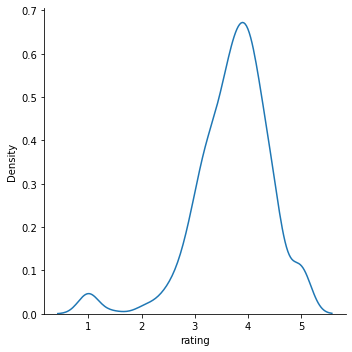

In [16]:
sns.displot(data=product_dff,x='rating',kind='kde')

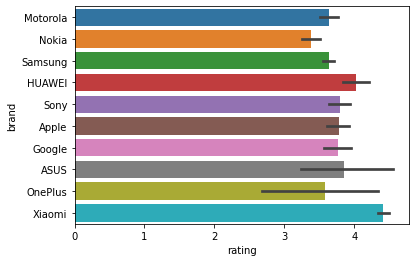

In [17]:
sns.barplot(data=product_dff,x=product_df.rating,y='brand')

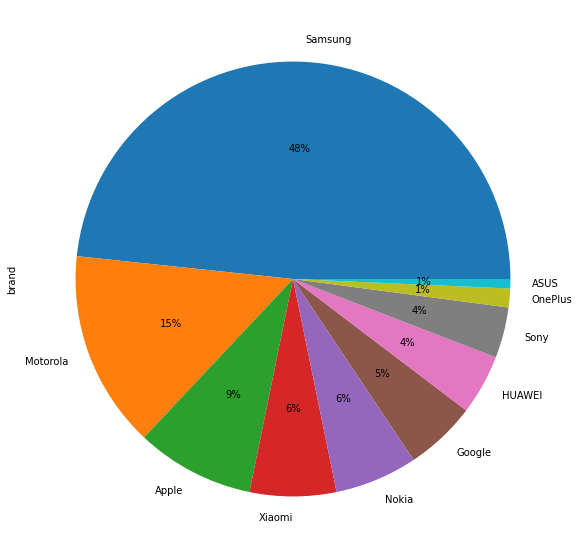

In [21]:
product_dff['brand'].value_counts().plot(kind='pie', autopct= '%1.0f%%', figsize= (12,10))

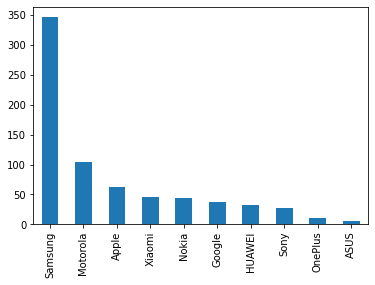

In [18]:
product_dff['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

In [22]:
# Calculating average rating per brand

rating_per_brand = product_dff.groupby(by='brand')['rating'].mean().sort_values(ascending=False)
rating_per_brand

brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

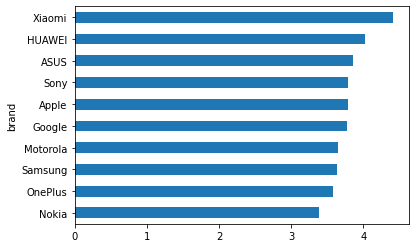

In [23]:
product_dff.groupby(by='brand')['rating'].mean().sort_values().plot(kind='barh')

### 4.6 Display average price per brand

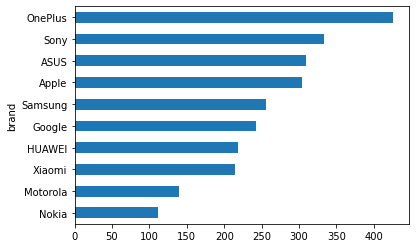

In [24]:
product_dff.groupby(by='brand')['price'].mean().sort_values().plot(kind='barh')

### 4.7 Display average 'totalReviews' per brand

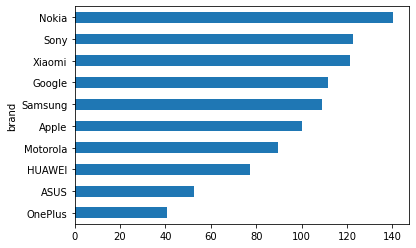

In [25]:
product_dff.groupby(by='brand')['totalReviews'].mean().sort_values().plot(kind='barh')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [26]:
df_final = pd.merge(review_df,product_dff,how='left',left_on='asin',right_on='asin')
df_final.shape

(67986, 14)

In [27]:
df_final.head(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [28]:
df_final.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)

In [29]:
df_final.head(2)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [30]:
df_final=df_final[df_final.verified==True]

In [31]:
df_final.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

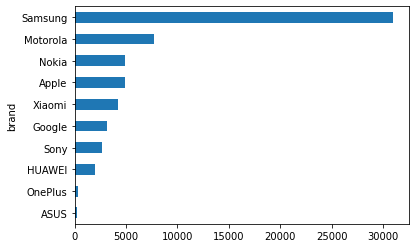

In [32]:
df_final.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [35]:
dff= df_final[['brand','body','price','user_rating','review_title']]
dff.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

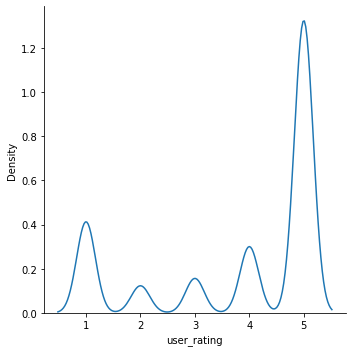

In [36]:
sns.displot(dff['user_rating'],kind='kde')

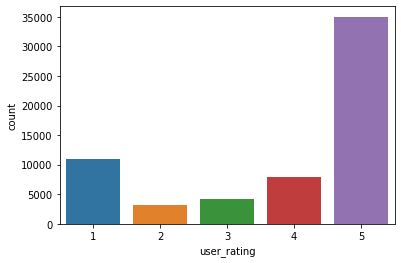

In [37]:
sns.countplot(dff['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [38]:
dff['sentiment']=dff['user_rating'].apply(lambda x: 1 if x>3 else 0)

### 4.15 Check frequency distribution of the 'sentiment'

In [39]:
dff['sentiment'].value_counts()

1    42939
0    18286
Name: sentiment, dtype: int64

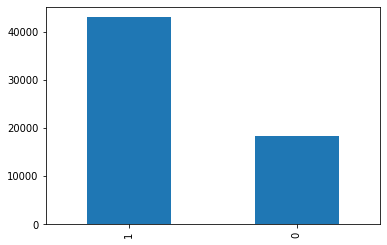

In [40]:
dff['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [41]:
pd.crosstab(dff['brand'], dff['sentiment']).apply(lambda r: r/r.sum(),axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


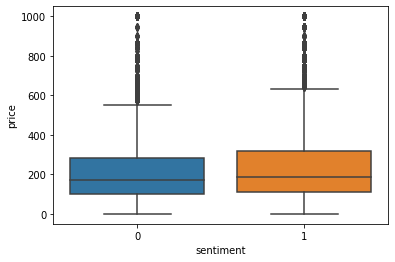

In [42]:
sns.boxplot(x=dff['sentiment'],y=dff['price'])

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [43]:
dff['body'].head(1)

14    DON'T BUY OUT OF SERVICE
Name: body, dtype: object

In [44]:
dff.iloc[0,1]

"DON'T BUY OUT OF SERVICE"

In [45]:
dff.loc[14,'body']

"DON'T BUY OUT OF SERVICE"

In [46]:
dff['keywords']=dff['body'].str.lower()
dff['keywords'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: keywords, dtype: object

In [47]:
dff['keywords']=dff['keywords'].astype('string')

In [48]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61207 non-null  string 
dtypes: float64(1), int64(2), object(3), string(1)
memory usage: 6.2+ MB


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [49]:
dff['keywords']=dff['keywords'].str.replace('[^\w\s]','')

In [50]:
dff['keywords'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: keywords, dtype: string

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
stop_words= set(stopwords.words('english'))

In [53]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [55]:
dff['keywords']=dff['keywords'].astype('str')

In [56]:
dff['keywords'] = dff['keywords'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
dff['keywords'].head()

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: keywords, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [57]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [58]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [59]:
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [60]:
dff['lemm'] = dff['keywords'].apply(lemmatize_text)
dff['lemm'].head()

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [61]:
from collections import Counter
cnt = Counter()
for text in dff["keywords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [62]:
rare_words=10
cnt.most_common()[:-rare_words-1:-1]

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1),
 ('4ever', 1)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [63]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [64]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [65]:
tfidf = tfidf_vectorizer.fit_transform(dff["keywords"])

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [66]:
y= dff['sentiment']

### 5.9 Split the data into Train & Test Sets

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)
print(rf_clf1.score(X_train, y1_train))
print(rf_clf1.score(X_test, y1_test))

0.9958699862332875
0.8877395470383276


In [69]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)

array([[12638,   162],
       [   15, 30042]])

In [70]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)

array([[ 4046,  1440],
       [  622, 12260]])

## 7. Write your conclusion

In [ ]:
#the model seems to be overfit as thetraining accuracy is 99.58% and test accuracy is 88.55 only.
#the model need to tune applying hyperparmeter in Randomforest.
#

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models